<a href="https://colab.research.google.com/github/Udayps2303/trial03/blob/main/Fruits_Clasification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("shreyapmaher/fruits-dataset-images")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/fruits-dataset-images


In [ ]:
!pip install -q kagglehub

import kagglehub
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
import os

# Download the dataset
path = kagglehub.dataset_download("shreyapmaher/fruits-dataset-images")
print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/fruits-dataset-images


# Train Test split

In [ ]:
from sklearn.model_selection import train_test_split
import shutil
import os

def split_data(source_dir, train_dir, test_dir, test_size=0.2):
    classes = os.listdir(source_dir)
    for cls in classes:
        os.makedirs(os.path.join(train_dir, cls), exist_ok=True)
        os.makedirs(os.path.join(test_dir, cls), exist_ok=True)

        files = os.listdir(os.path.join(source_dir, cls))
        train_files, test_files = train_test_split(files, test_size=test_size, random_state=42)

        for f in train_files:
            shutil.copy2(os.path.join(source_dir, cls, f), os.path.join(train_dir, cls, f))
        for f in test_files:
            shutil.copy2(os.path.join(source_dir, cls, f), os.path.join(test_dir, cls, f))

# Example usage (modify paths according to your dataset structure):
split_data('/kaggle/input/fruits-dataset-images/images/', '/content/train', '/content/test')

# Data Augmentation

In [ ]:
# Image dimensions for MobileNet
img_width, img_height = 224, 224
batch_size = 32

# Data generators with augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

# Validation generator (only rescaling)
test_datagen = ImageDataGenerator(rescale=1./255)

# Flow from directory
train_generator = train_datagen.flow_from_directory(
    '/content/train',  # modify this path
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    '/content/test',  # modify this path
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

Found 287 images belonging to 9 classes.
Found 72 images belonging to 9 classes.


# Prepare Model

In [ ]:
# Load MobileNet with pre-trained weights (excluding top)
base_model = MobileNet(weights='imagenet', include_top=False,
                       input_shape=(img_width, img_height, 3))

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(train_generator.num_classes, activation='softmax')(x)

# Create the model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


# Train Model

In [ ]:
epochs = 10

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 33s 4s/step - accuracy: 0.2144 - loss: 2.7233 - val_accuracy: 0.5781 - val_loss: 1.3396
Epoch 2/10
1/8 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.5625 - loss: 1.7128

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


8/8 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.5625 - loss: 1.7128 - val_accuracy: 0.6406 - val_loss: 1.0540
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 41s 5s/step - accuracy: 0.8270 - loss: 0.5267 - val_accuracy: 0.7812 - val_loss: 0.6314
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.6562 - loss: 0.9625 - val_accuracy: 0.8125 - val_loss: 0.5008
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 41s 6s/step - accuracy: 0.9386 - loss: 0.2684 - val_accuracy: 0.7969 - val_loss: 0.6666
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 546ms/step - accuracy: 0.9062 - loss: 0.2944 - val_accuracy: 0.8281 - val_loss: 0.6269
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 41s 5s/step - accuracy: 0.9585 - loss: 0.1460 - val_accuracy: 0.8438 - val_loss: 0.3884
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 733ms/step - accuracy: 0.8750 - loss: 0.2491 - val_accuracy: 0.8906 - val_loss: 0.3619
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 60s 3s/step - accuracy: 0.9929 - loss: 0.0526 - val_accuracy: 0.8594 - val_loss: 0.4923
Epoch 10/10
8/8

# Model Evaluation

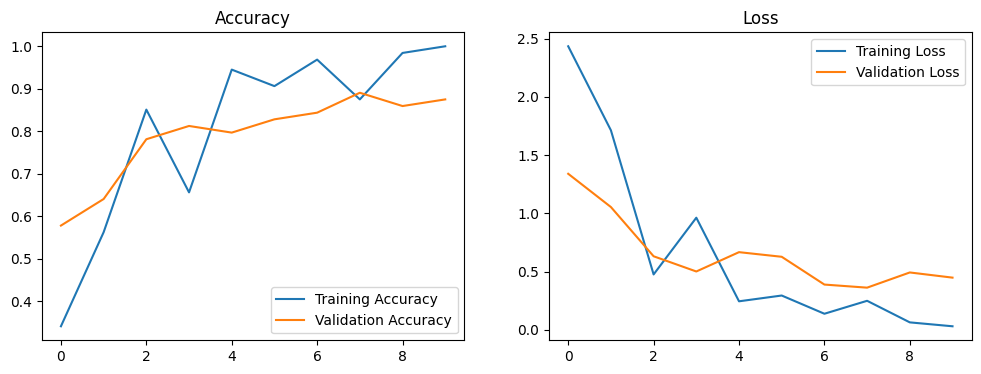

In [ ]:
# Plot training history
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.legend()

plt.show()

# Save the model
model.save('fruit_classifier_mobilenet.h5')

# Predictions

In [ ]:
from tensorflow.keras.models import load_model
import numpy as np
from tensorflow.keras.preprocessing import image

# Load the saved model
model = load_model('fruit_classifier_mobilenet.h5')

# Get class names (assuming you used image_dataset_from_directory)
class_names = ['apple', 'banana', 'cherry', 'chickoo', 'grapes', 'kiwi', 'mango', 'orange', 'strawberry']  # Replace with your actual class names

In [ ]:
def predict_fruit(img_path, model, class_names):
    # Load and preprocess the image
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = img_array / 255.0  # Normalize (same as during training)

    # Make prediction
    predictions = model.predict(img_array)
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = np.max(predictions[0])

    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step


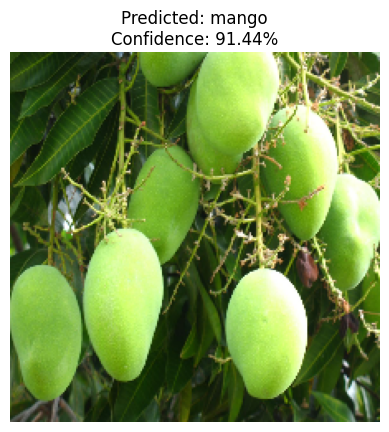

In [ ]:
import matplotlib.pyplot as plt

def show_prediction(img_path, model, class_names):
    predicted_class, confidence = predict_fruit(img_path, model, class_names)

    img = image.load_img(img_path, target_size=(224, 224))
    plt.imshow(img)
    plt.title(f"Predicted: {predicted_class}\nConfidence: {confidence:.2%}")
    plt.axis('off')
    plt.show()

# Example usage
show_prediction('/content/test/mango fruit/Image_14.jpg', model, class_names)